# Henry's work

Testin the new training data while not dataset split

In [2]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.base import TransformerMixin
from sklearn import tree
from sklearn import preprocessing
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.externals import joblib

Initialize the output format and the output key dictionary


In the follow cell, will using the keyword traning set to explore the accurcy improvement

In [3]:
np.random.seed(1)

# useing different keyword
# TRAINING_FILE = "training.csv"
TRAINING_FILE = "../keyword.csv"
TEST_FILE = "../key_word_test.csv"
time_format = '%Y-%m-%d*%H:%M:%S'

#x_label = 'key_word_50'
x_label = 'key_word_100'
#x_label = 'article_words'

topic_code = {
    'ARTS CULTURE ENTERTAINMENT': 1,
    'BIOGRAPHIES PERSONALITIES PEOPLE': 2,
    'DEFENCE': 3,
    'DOMESTIC MARKETS': 4,
    'FOREX MARKETS': 5,
    'HEALTH': 6,
    'MONEY MARKETS': 7,
    'SCIENCE AND TECHNOLOGY': 8,
    'SHARE LISTINGS': 9,
    'SPORTS': 10,
    'IRRELEVANT': 0
}

### Try to implement with key word

In [22]:
def preprocess(df):
    df['topic_code'] = df['topic'].apply(lambda x: topic_code[x])

    return df[['article_words', 'topic_code', 'key_word_50', 'key_word_100', 'topic']]

def bag_of_word(train_set, test_set, model, label_model):
    vector = model
    train_x = vector.transform(train_set[x_label].values)
    train_y = label_model.transform(train_set['topic'])
    test_x = vector.transform(test_set[x_label].values)
    test_y = label_model.transform(test_set['topic'])

    return train_x, train_y, test_x, test_y

def convert_word(bag_of_word_model, label_model, data_set):
    act_x = bag_of_word_model.transform(data_set[x_label].values)
    act_y = label_model.transform(data_set['topic'])

    return act_x, act_y

## Main program part, pre-processing in model

In [23]:
# load data from file
df = pd.read_csv(TRAINING_FILE)

# pre process the y
df = preprocess(df)

# split the data
#train_set, test_set = train_test_split(df, test_size=0.1)

# Using different model to convert word
vector_model = TfidfVectorizer().fit(df[x_label])
#vector_model = CountVectorizer().fit(df[x_label])
label_model = preprocessing.LabelEncoder().fit(df['topic'])
#train_x, train_y, test_x, test_y = bag_of_word(train_set, test_set, CountVectorizer().fit(df['article_words']))
#train_x, train_y, test_x, test_y = bag_of_word(train_set, test_set, vector_model, label_model)
#train_x, train_y, test_x, test_y = bag_of_word(train_set, test_set, HashingVectorizer())

train_x, train_y = convert_word(vector_model, label_model, df)

print('Training set size:', train_x.shape)
# print('Test set size:', test_x.shape)

Training set size: (9500, 487)


### using pervious result to first detected the result of model

---
pervious is when min_samples_leaf equal to 29 can get the best AUC

In [24]:
smote = SMOTE(random_state=1)
sm_x, sm_y = smote.fit_sample(train_x, train_y)


In [29]:
%%time

# train
test_record = []

dtc = DecisionTreeClassifier(min_samples_leaf=1)
dtc.fit(train_x, train_y)

print("The accuracy of Training set is:", dtc.score(train_x, train_y))
#print("The accuracy of Test set is:", dtc.score(test_x, test_y))
test_file_test(dtc)
# save_job(x_label, 'tfidf', dtc)

The accuracy of Training set is: 0.9857894736842105
Topic	f1	accuarcy	recall_score
['ARTS CULTURE ENTERTAINMENT', {'f1': 1.0, 'accuarcy': 1.0, 'recall_score': 1.0}]
['SPORTS', {'f1': 0.2997, 'accuarcy': 0.8167, 'recall_score': 0.2722}]
['IRRELEVANT', {'f1': 0.0975, 'accuarcy': 0.782, 'recall_score': 0.0869}]
['MONEY MARKETS', {'f1': 0.2596, 'accuarcy': 0.6377, 'recall_score': 0.2126}]
['DEFENCE', {'f1': 0.254, 'accuarcy': 0.6154, 'recall_score': 0.2051}]
['HEALTH', {'f1': 0.12, 'accuarcy': 0.4286, 'recall_score': 0.0857}]
['FOREX MARKETS', {'f1': 0.1961, 'accuarcy': 0.4167, 'recall_score': 0.1389}]
['SCIENCE AND TECHNOLOGY', {'f1': 0.1667, 'accuarcy': 0.3333, 'recall_score': 0.1111}]
['SHARE LISTINGS', {'f1': 0.1481, 'accuarcy': 0.2857, 'recall_score': 0.0952}]
['BIOGRAPHIES PERSONALITIES PEOPLE', {'f1': 0.0392, 'accuarcy': 0.1333, 'recall_score': 0.0222}]
['DOMESTIC MARKETS', {'f1': 0.0, 'accuarcy': 0.0, 'recall_score': 0.0}]
CPU times: user 2.34 s, sys: 8.45 ms, total: 2.35 s
Wall ti

In [16]:
predict_proba = dtc.predict_proba(train_x)
auc = roc_auc_score(train_y, predict_proba, multi_class='ovr')
print("Current auc is:", auc)

Current auc is: 0.9669437250549634


## Try to implement in a range

in the range between 21-50

fiting with leaf value = 1 ......Done!
fiting with leaf value = 2 ......Done!
fiting with leaf value = 3 ......Done!
fiting with leaf value = 4 ......Done!
fiting with leaf value = 5 ......Done!
fiting with leaf value = 6 ......Done!
fiting with leaf value = 7 ......Done!
fiting with leaf value = 8 ......Done!
fiting with leaf value = 9 ......Done!
fiting with leaf value = 10 ......Done!
fiting with leaf value = 11 ......Done!
fiting with leaf value = 12 ......Done!
fiting with leaf value = 13 ......Done!
fiting with leaf value = 14 ......Done!
fiting with leaf value = 15 ......Done!
fiting with leaf value = 16 ......Done!
fiting with leaf value = 17 ......Done!
fiting with leaf value = 18 ......Done!
fiting with leaf value = 19 ......Done!
The optimal number of min_samples_leaf by TEST set is: 1
With max AUC by TEST is: 0.99985253252818
The accuracy of BEST model in Training set is: 0.9836842105263158


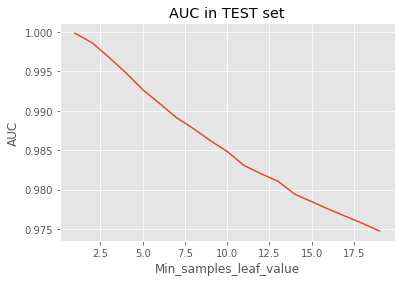

In [21]:
test_record = []
best_model = None

min_samples_leaf_value = 0
max_auc = 0
leaf_value_range = range(1, 20)
for leaf_value in leaf_value_range:
    print("\rfiting with leaf value = {} ...... ".format(leaf_value), end="")
    model = DecisionTreeClassifier(min_samples_leaf=leaf_value)
    model.fit(train_x, train_y)
    
    print("Done!")

    prediction = model.predict_proba(train_x)
    auc = roc_auc_score(train_y, prediction, multi_class='ovr')
    test_record.append(auc)

    if auc > max_auc:
        max_auc = auc
        min_samples_leaf_value = leaf_value
        best_model = model

print("The optimal number of min_samples_leaf by TEST set is:", min_samples_leaf_value)
print("With max AUC by TEST is:", max_auc)
print("The accuracy of BEST model in Training set is:", best_model.score(train_x, train_y))
#print("The accuracy of BEST model in Test set is:", best_model.score(test_x, test_y))

plt.style.use('ggplot')
# fig = plt.figure(figsize=(12, 6))
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(leaf_value_range, test_record)
ax1.set_title('AUC in TEST set')
ax1.set_xlabel('Min_samples_leaf_value')
ax1.set_ylabel('AUC')

plt.show()

## Using the best model found in pervious range to check the result

### Define the evulate function

In [27]:

def topic_score(model, data_set, topic_name):
    test_data_set = data_set[data_set['topic'] == topic_name]
    test_x, test_y = convert_word(vector_model, label_model, test_data_set)
    pred_y = model.predict(test_x)

    f1_score = metrics.f1_score(test_y, pred_y, average='macro')
    accuarcy = metrics.accuracy_score(test_y, pred_y)
    recall_score = metrics.recall_score(test_y, pred_y, average='macro')

    result = {}
    result['f1'] = round(f1_score, 4)
    result['accuarcy'] = round(accuarcy, 4)
    result['recall_score'] = round(recall_score, 4)

    return result

def test_file_test(model):
    print('Topic\tf1\taccuarcy\trecall_score')
    test_report = []

    test_df = pd.read_csv(TEST_FILE)
    test_df = preprocess(test_df)
    for topic in topic_code.keys():
        result = [topic]
        result.append(topic_score(model, test_df, topic))
        # print(topic,'\t',result[0],'\t',result[1],'\t',result[2],'\t')
        test_report.append(result)

    test_report.sort(reverse=True, key=lambda x: x[1]['accuarcy'])
    for record in test_report:
        print(record)

In [14]:
print('Topic\tf1\taccuarcy\trecall_score')
report = []
for topic in topic_code.keys():
    result = topic_score(best_model, df, topic)
    # print(topic,'\t',result[0],'\t',result[1],'\t',result[2],'\t')
    report.append(result)

report.sort(reverse=)

SyntaxError: invalid syntax (<ipython-input-14-61e807edaccd>, line 8)

## For test set

In [26]:
def test_file_test(model):
    print('Topic\tf1\taccuarcy\trecall_score')
    test_report = []

    test_df = pd.read_csv(TEST_FILE)
    test_df = preprocess(test_df)
    for topic in topic_code.keys():
        result = [topic]
        result.append(topic_score(model, test_df, topic))
        # print(topic,'\t',result[0],'\t',result[1],'\t',result[2],'\t')
        test_report.append(result)

    test_report.sort(reverse=True, key=lambda x: x[1]['accuarcy'])
    for record in test_report:
        print(record)

## Save model

In [64]:
filename = 'model/50_no_sm_count'

joblib.dump(dtc, filename+'.model')
with open(filename+'.txt', 'w') as fp:
    fp.write('Topic\tf1\taccuarcy\trecall_score\n')
    for record in test_report:
        fp.write(str(record)+'\n')

In [19]:
def save_job(label_name, vector_name, model):
    filename = 'model/'+label_name+'_'+vector_name

    joblib.dump(model, filename+'.model')
    with open(filename+'.txt', 'w') as fp:
        fp.write('Topic\tf1\taccuarcy\trecall_score\n')
        for record in test_report:
            fp.write(str(record)+'\n')